<a href="https://colab.research.google.com/github/yasminshalabi811/first-challenge/blob/main/lung%20cancer%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, StratifiedKFold,KFold, cross_val_predict , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier


import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score ,confusion_matrix 


import warnings
warnings.simplefilter(action='ignore')




In [193]:
lung = pd.read_csv('survey lung cancer.csv')


In [194]:
print('Dataset :',lung.shape)


Dataset : (309, 16)


In [195]:
lung.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [196]:
lung.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [197]:
lung['LUNG_CANCER'].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

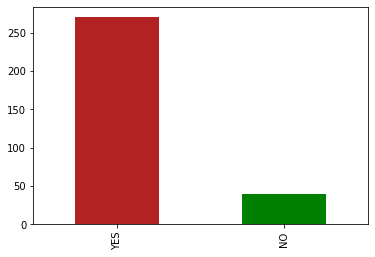

In [198]:
lung.LUNG_CANCER .value_counts()[0:50].plot(kind='bar',color=["firebrick", "green"])
plt.show()

In [199]:
lung.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [200]:
lung.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [201]:
lung.duplicated().sum()

33

In [202]:
lung = lung.drop_duplicates()
lung.describe()


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [203]:
def custom_palette(custom_colors):
    customPalette = sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors),size=0.8)
    plt.tick_params(axis='both', labelsize=0, length = 0)

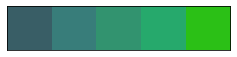

In [204]:
pal = ["#395e66","#387d7a","#32936f","#26a96c","#2bc016"]
custom_palette(pal)

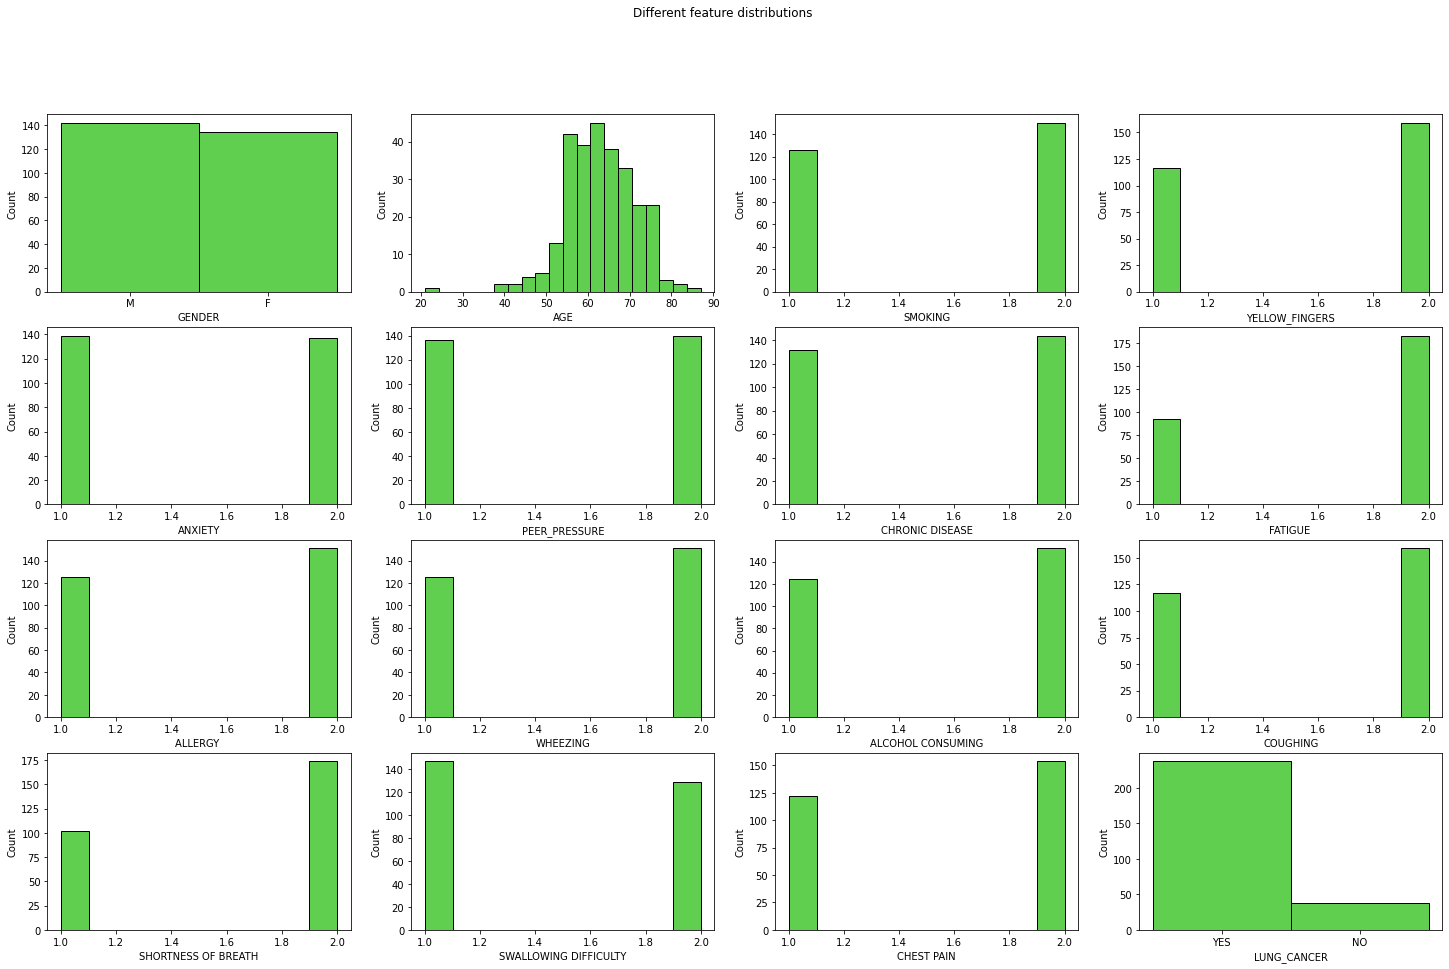

In [205]:
  fig, axes = plt.subplots(4, 4, figsize=(25, 15))
fig.suptitle('Different feature distributions')

axes = axes.reshape(16,)

for i,column in enumerate(lung.columns):
    sns.histplot(ax = axes[i],data = lung, x= column, color=pal[4])

In [206]:
print(lung['GENDER'].unique())
print(lung['LUNG_CANCER'].unique())

['M' 'F']
['YES' 'NO']


In [207]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

lung.iloc[:,0]= labelencoder.fit_transform(lung.iloc[:,0].values)

lung.iloc[:,15]= labelencoder.fit_transform(lung.iloc[:,15].values)

In [208]:
print(lung['GENDER'].unique())
print(lung['LUNG_CANCER'].unique())

[1 0]
[1 0]


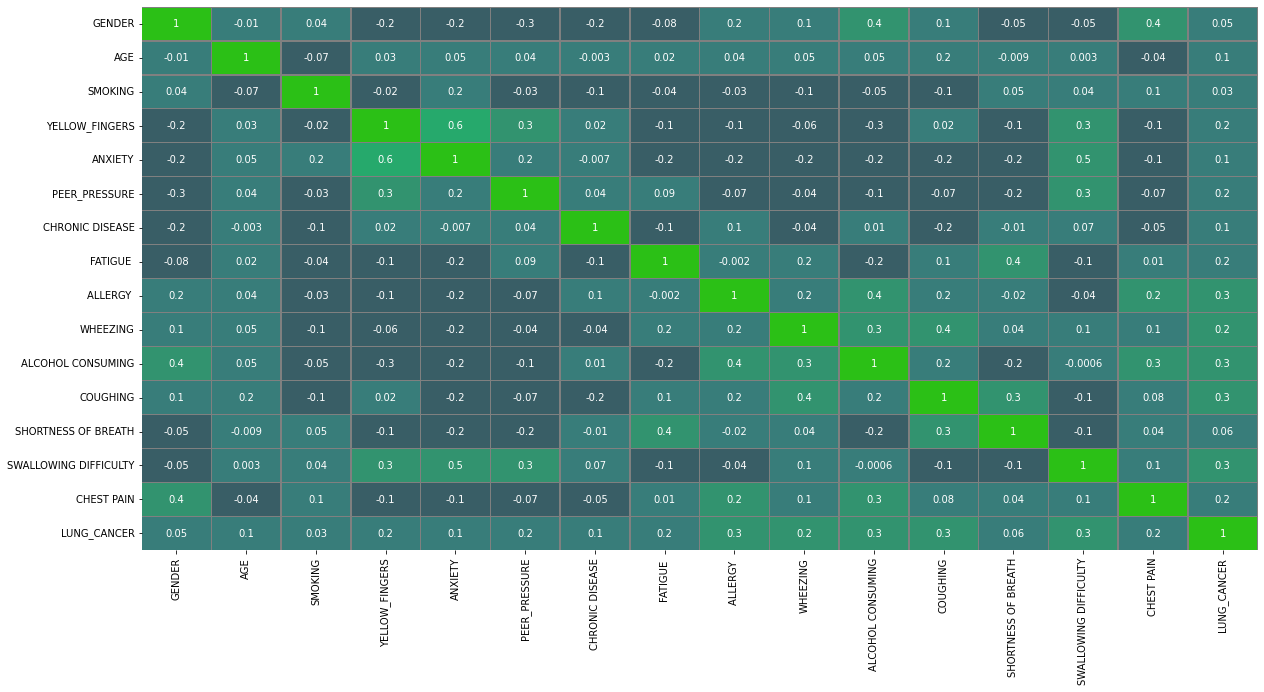

In [209]:
plt.figure(figsize=(20,10))
sns.heatmap(lung.corr(), annot=True,fmt='.1g', cmap=pal, cbar=False, linewidths=0.5, linecolor='grey');

In [210]:
from sklearn.model_selection import train_test_split
y= lung['LUNG_CANCER']
X = lung.drop(columns=['LUNG_CANCER'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

In [211]:
from sklearn.feature_selection import RFE
linmdl = RandomForestClassifier()      

mdl = RFE(estimator=linmdl,n_features_to_select=5)
mdl.fit(X,y)
ix = mdl.get_support() 

data1 = pd.DataFrame(mdl.transform(X), columns = X.columns.values[ix]) 
data1.head(n=5)

,AGE,YELLOW_FINGERS,FATIGUE,ALLERGY,ALCOHOL CONSUMING
0,69,2,2,1,2
1,74,1,2,2,1
2,59,1,2,1,1
3,63,2,1,1,2
4,63,2,1,1,1


In [212]:
y = lung['LUNG_CANCER']
X = data1

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [214]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (193, 5)
Y train shape:  (193,)
X test shape:  (83, 5)
Y test shape:  (83,)


In [215]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
lung1 = pd.DataFrame(scaler.fit_transform(lung),columns=lung.columns,index=lung.index)

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 81.93
The cross validated score for Logistic REgression is: 86.24
[[ 2  2]
 [13 66]]
LR_Precision: 0.9705882352941176
LR_specificity: 0.5
LR_Recall: 0.8354430379746836
LR_F1: 0.8979591836734694


Text(0.5, 1.05, 'Confusion_matrix')

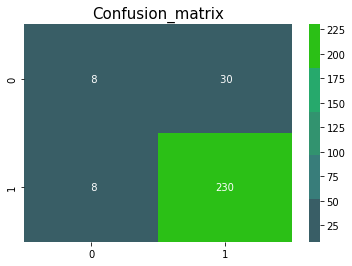

In [216]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))
kfold = KFold(n_splits=10)                     
result_lr=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Logistic REgression is:',round(result_lr.mean()*100,2))
y_pred= cross_val_predict(model,X,y,cv=10)

confusion = metrics.confusion_matrix(prediction_lr,y_test)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


LR_Precision = metrics.precision_score(prediction_lr,y_test)
LR_specificity = TN / (TN + FP)
LR_Recall= metrics.recall_score(prediction_lr,y_test)
LR_F1= metrics.f1_score(prediction_lr,y_test)
print('LR_Precision:', LR_Precision )
print('LR_specificity:', LR_specificity )
print('LR_Recall:',LR_Recall)
print('LR_F1:',LR_F1)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap=pal)
plt.title('Confusion_matrix', y=1.05, size=15)

The accuracy of the Random Forest Classifier is 81.93
The cross validated score for Random Forest Classifier is: 86.23
[[ 4  4]
 [11 64]]
RF_Precision: 0.9411764705882353
RF_specificity: 0.5
RF_Recall: 0.8533333333333334
RF_F1: 0.8951048951048952


Text(0.5, 1.05, 'Confusion_matrix')

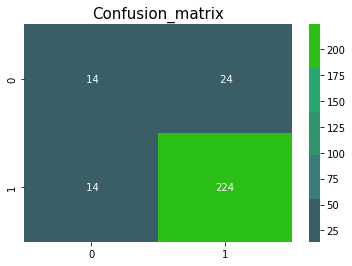

In [217]:
model = RandomForestClassifier(criterion='entropy',max_depth=5,n_estimators=500,min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,random_state=5, n_jobs=-1)
model.fit(X_train,y_train)
prediction_rf=model.predict(X_test)
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(prediction_rf,y_test)*100,2))
kfold = KFold(n_splits=10,)        
result_rf=cross_val_score(model,X,y,cv=10,scoring='accuracy')

print('The cross validated score for Random Forest Classifier is:',round(result_rf.mean()*100,2))

confusion = metrics.confusion_matrix(prediction_rf,y_test)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

y_pred = cross_val_predict(model,X,y,cv=10)
RF_Precision = metrics.precision_score(prediction_rf,y_test)
RF_specificity = TN / (TN + FP)
RF_Recall= metrics.recall_score(prediction_rf,y_test)
RF_F1= metrics.f1_score(prediction_rf,y_test)

print('RF_Precision:', RF_Precision )
print('RF_specificity:',RF_specificity )
print('RF_Recall:',RF_Recall)
print('RF_F1:',RF_F1)

sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap=pal)
plt.title('Confusion_matrix', y=1.05, size=15)

The accuracy of the DecisionTree Classifier is 81.93
The cross validated score for Decision Tree classifier is: 86.24
[[ 0  0]
 [15 68]]
DT_Precision: 1.0
DT_specificity: nan
DT_Recall: 0.8192771084337349
DT_F1: 0.9006622516556291


Text(0.5, 1.05, 'Confusion_matrix')

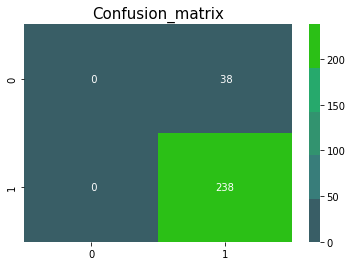

In [218]:
model= tree.DecisionTreeClassifier(criterion='entropy',random_state=1,min_samples_split=100,
                              min_samples_leaf=1,max_features='auto')
model.fit(X_train,y_train)
prediction_tree=model.predict(X_test)
print('The accuracy of the DecisionTree Classifier is',round(accuracy_score(prediction_tree,y_test)*100,2))
kfold = KFold(n_splits=10)
result_tree=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Decision Tree classifier is:',round(result_tree.mean()*100,2))

confusion = metrics.confusion_matrix(prediction_tree,y_test)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

y_pred = cross_val_predict(model, X, y,cv=10)
DT_Precision = metrics.precision_score(prediction_tree,y_test)
DT_specificity = TN / (TN + FP)
DT_Recall= metrics.recall_score(prediction_tree,y_test)
DT_F1= metrics.f1_score(prediction_tree,y_test)

print('DT_Precision:', DT_Precision )
print('DT_specificity:',DT_specificity )
print('DT_Recall:',DT_Recall)
print('DT_F1:',DT_F1)

sns.heatmap(confusion_matrix(y, y_pred),annot=True,fmt='3.0f',cmap=pal)
plt.title('Confusion_matrix',y=1.05,size=15)

The accuracy of the Support Vector Machines Classifier is 81.93
The cross validated score for Support Vector Machines Classifier is: 86.24
[[ 0  0]
 [15 68]]
SVM_Precision: 1.0
SVM_specificity: nan
SVM_Recall: 0.8192771084337349
SVM_F1: 0.9006622516556291


Text(0.5, 1.05, 'Confusion_matrix')

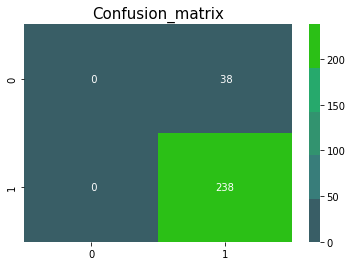

In [219]:
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(X_train,y_train)
prediction_svm=model.predict(X_test)

print('The accuracy of the Support Vector Machines Classifier is',round(accuracy_score(prediction_svm,y_test)*100,2))

kfold = KFold(n_splits=10)                                       
result_svm=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Support Vector Machines Classifier is:',round(result_svm.mean()*100,2))
y_pred = cross_val_predict(model, X, y, cv=10)

confusion = metrics.confusion_matrix(prediction_svm,y_test)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

SVM_Precision = metrics.precision_score(prediction_svm,y_test)
SVM_specificity = TN / (TN + FP)

SVM_Recall= metrics.recall_score(prediction_svm,y_test)
SVM_F1= metrics.f1_score(prediction_svm,y_test)
print('SVM_Precision:', SVM_Precision )
print('SVM_specificity:',SVM_specificity )

print('SVM_Recall:',SVM_Recall)
print('SVM_F1:',SVM_F1)

sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap=pal)
plt.title('Confusion_matrix',y=1.05, size=15)

The accuracy of the K Nearst Neighbors Classifier is 80.72
The cross validated score for K Nearest Neighbors Classifier is: 85.87
[[ 0  1]
 [15 67]]
KNN_Precision: 0.9852941176470589
KNN_specificity: 0.0
KNN_Recall: 0.8170731707317073
KNN_F1: 0.8933333333333334


Text(0.5, 1.05, 'Confusion_matrix')

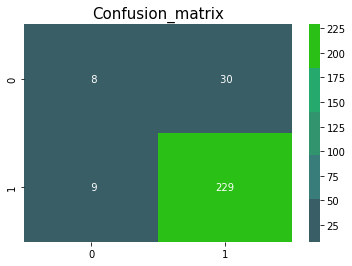

In [220]:
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)
print('The accuracy of the K Nearst Neighbors Classifier is',round(accuracy_score(prediction_knn,y_test)*100,2))

kfold = KFold(n_splits=10)
result_knn=cross_val_score(model, X, y, cv=10, scoring='accuracy')

print('The cross validated score for K Nearest Neighbors Classifier is:',round(result_knn.mean()*100,2))
y_pred = cross_val_predict(model,X,y,cv=10)


confusion = metrics.confusion_matrix(prediction_knn,y_test)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

KNN_Precision = metrics.precision_score(prediction_knn,y_test)
KNN_specificity = TN / (TN + FP)

KNN_Recall= metrics.recall_score(prediction_knn,y_test)
KNN_F1= metrics.f1_score(prediction_knn,y_test)
print('KNN_Precision:',KNN_Precision )
print('KNN_specificity:',KNN_specificity )

print('KNN_Recall:',KNN_Recall)
print('KNN_F1:',KNN_F1)

sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap=pal)
plt.title('Confusion_matrix',y=1.05,size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the AdaBoostClassifier is 84.34
The cross validated score for AdaBoostClassifier is: 86.23
[[ 4  2]
 [11 66]]
AdB_Precision: 0.9705882352941176
AdB_specificity: 0.6666666666666666
AdB_Recall: 0.8571428571428571
AdB_F1: 0.9103448275862068


Text(0.5, 1.05, 'Confusion_matrix')

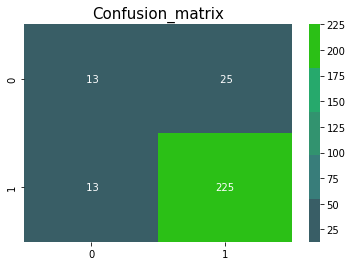

In [221]:
model= AdaBoostClassifier(random_state=0)
model.fit(X_train,y_train)
prediction_adb=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the AdaBoostClassifier is',round(accuracy_score(prediction_adb,y_test)*100,2))

kfold = KFold(n_splits=10)
result_adb=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_adb.mean()*100,2))
y_pred = cross_val_predict(model,X,y,cv=10)

confusion = metrics.confusion_matrix(prediction_adb,y_test)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

AdB_Precision = metrics.precision_score(prediction_adb,y_test)
AdB_specificity = TN / (TN + FP)

AdB_Recall= metrics.recall_score(prediction_adb,y_test)
AdB_F1= metrics.f1_score(prediction_adb,y_test)

print('AdB_Precision:', AdB_Precision )
print('AdB_specificity:', AdB_specificity )

print('AdB_Recall:',AdB_Recall)
print('AdB_F1:',AdB_F1)

sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap=pal)
plt.title('Confusion_matrix',y=1.05,size=15)

In [222]:
models = pd.DataFrame({
    'Model': ['SVM','KNN','LR', 'RF','AdB', 'DT'],
    'Accuracy_score': [result_svm.mean(),result_knn.mean(), result_lr.mean(), result_rf.mean(),result_adb.mean(), result_tree.mean()],
    'Precision': [LR_Precision ,RF_Precision ,KNN_Precision,SVM_Precision,AdB_Precision,DT_Precision],
    'Specificity':[LR_specificity ,RF_specificity ,KNN_specificity,SVM_specificity,AdB_specificity,DT_specificity],
    'f1 score': [LR_F1,RF_F1,KNN_F1,SVM_F1,AdB_F1,DT_F1],
    'Recall': [LR_Recall,RF_Recall,KNN_Recall,SVM_Recall,AdB_Recall,DT_Recall],
    })

models.sort_values(by='Accuracy_score', ascending=False)

,Model,Accuracy_score,Precision,Specificity,f1 score,Recall
0,SVM,0.862434,0.970588,0.500000,0.897959,0.835443
5,DT,0.862434,1.000000,NaN,0.900662,0.819277
2,LR,0.862434,0.985294,0.000000,0.893333,0.817073
3,RF,0.862302,1.000000,NaN,0.900662,0.819277
4,AdB,0.862302,0.970588,0.666667,0.910345,0.857143
1,KNN,0.858730,0.941176,0.500000,0.895105,0.853333


Text(0.5, 1.03, 'Model Comparison - Model Accuracy')

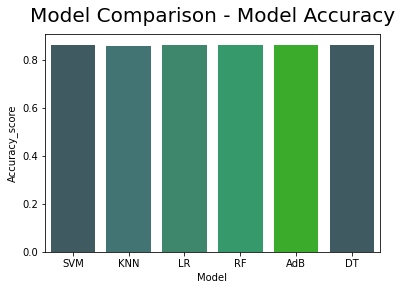

In [223]:
sns.barplot(x='Model', y='Accuracy_score', ci=None, data= models,palette=pal)
plt.title("Model Comparison - Model Accuracy", fontsize=20, fontname="Helvetica", y=1.03)



In [224]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [225]:
lr.score(X_test, y_test).round(3)


0.293

In [226]:
preds = lr.predict(X_test)

print(metrics.classification_report(preds, y_test))


ValueError: ignored

In [252]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=5, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [253]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [254]:
history = model.fit(X_train, y_train, epochs=500, batch_size=64)




Epoch 1/500
4/4 [==============================] - 1s 4ms/step - loss: 3.1545 - accuracy: 0.8808
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 2.6414 - accuracy: 0.8808
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 2.6771 - accuracy: 0.8808
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 2.3337 - accuracy: 0.8808
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 2.1571 - accuracy: 0.8808
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 1.7860 - accuracy: 0.8860
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 1.8354 - accuracy: 0.8705
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 1.6038 - accuracy: 0.8653
Epoch 9/500
4/4 [==============================] - 0s 5ms/step - loss: 1.4217 - accuracy: 0.8497
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 1.4083 - accuracy: 0.8653
Epoch 11/500
4/4 [===========

In [255]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=500, batch_size=64)

Epoch 1/500
4/4 [==============================] - 0s 87ms/step - loss: 0.3334 - accuracy: 0.8808 - val_loss: 0.4830 - val_accuracy: 0.8193
Epoch 2/500
4/4 [==============================] - 0s 13ms/step - loss: 0.3599 - accuracy: 0.8808 - val_loss: 0.4838 - val_accuracy: 0.8193
Epoch 3/500
4/4 [==============================] - 0s 15ms/step - loss: 0.3635 - accuracy: 0.8808 - val_loss: 0.4856 - val_accuracy: 0.8193
Epoch 4/500
4/4 [==============================] - 0s 15ms/step - loss: 0.3711 - accuracy: 0.8808 - val_loss: 0.4860 - val_accuracy: 0.8193
Epoch 5/500
4/4 [==============================] - 0s 15ms/step - loss: 0.3310 - accuracy: 0.8808 - val_loss: 0.4865 - val_accuracy: 0.8193
Epoch 6/500
4/4 [==============================] - 0s 12ms/step - loss: 0.3612 - accuracy: 0.8808 - val_loss: 0.4864 - val_accuracy: 0.8193
Epoch 7/500
4/4 [==============================] - 0s 12ms/step - loss: 0.3699 - accuracy: 0.8808 - val_loss: 0.4866 - val_accuracy: 0.8193
Epoch 8/500
4/4 [===

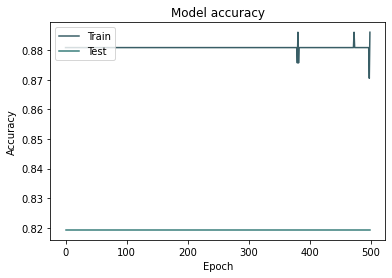

In [256]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

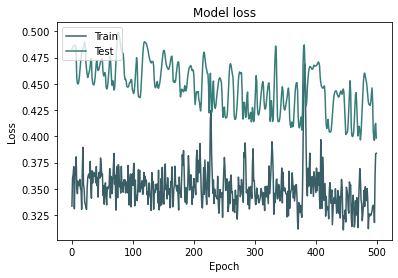

In [257]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()